# Model evaluation
---

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history (filename, epochs):
    history = pd.read_csv (filename)
    history.rename (columns={'Unnamed: 0': 'epoch'}, inplace=True)
    
    fig, axs = plt.subplots (1,2)
    
    axs[0].plot (history['epoch'][:epochs], history['fbeta'][:epochs])
    axs[0].plot (history['epoch'][:epochs], history['val_fbeta'][:epochs])
    axs[0].legend ()
    
    axs[1].plot (history['epoch'][:epochs], history['loss'][:epochs])
    axs[1].plot (history['epoch'][:epochs], history['val_loss'][:epochs])
    axs[1].legend ()
    
    fig.set_size_inches ((15, 6))
    plt.show ()
    
    return history

def running_mean (x, N):
    cumsum = np.cumsum (np.insert (x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

## last model
is reference for further work

- no image standardization

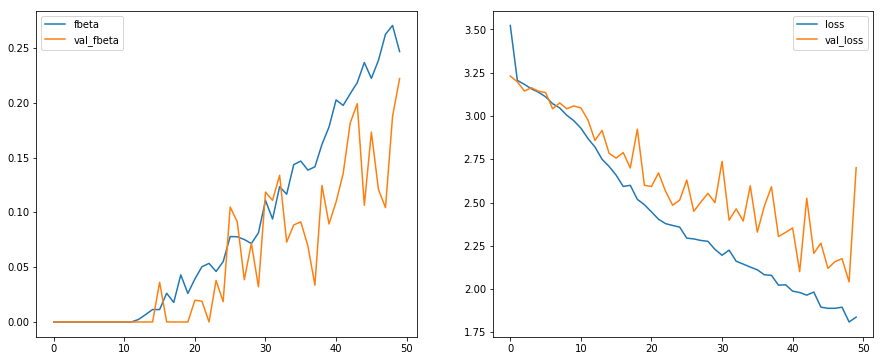

In [3]:
history = plot_history ('20180906-140724_model.hist.csv', 50)

In [4]:
history.head ()

,epoch,fbeta,loss,val_fbeta,val_loss
0,0,9.878489e-09,3.523146,1.041667e-08,3.231035
1,1,1.000000e-08,3.205881,1.041667e-08,3.197504
2,2,1.000000e-08,3.182902,1.041667e-08,3.144299
3,3,1.000000e-08,3.156921,1.041667e-08,3.163419
4,4,1.000000e-08,3.137524,1.041667e-08,3.143163


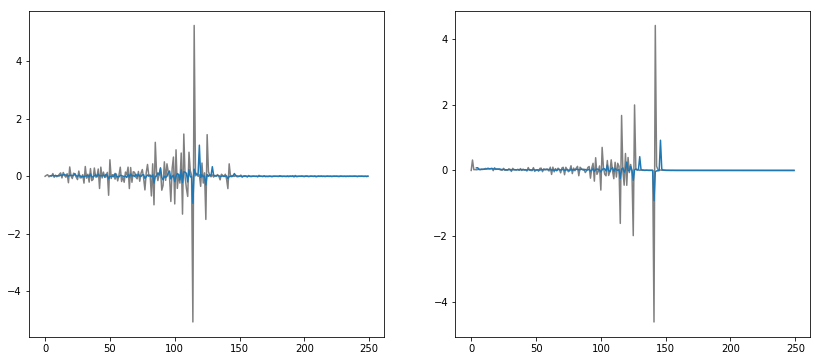

In [5]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [6]:
diff_val_loss.describe ()
#diff_loss.describe ()

,epoch,val_loss
count,250.000000,250.000000
mean,124.500000,0.011478
std,72.312977,0.547732
min,0.000000,-5.066177
25%,62.250000,-0.017880
50%,124.500000,0.001820
75%,186.750000,0.045754
max,249.000000,5.243836


## model

In [7]:
with open ('20180906-151918_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'loss': "<class 'function'>", 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.01, 'opt': "<class 'keras.optimizers.SGD'>"}


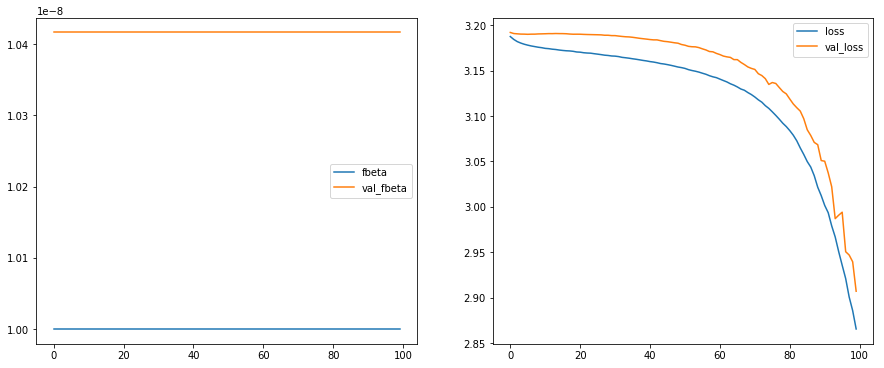

In [7]:
history = plot_history ('20180906-151918_model.hist.csv', 100)

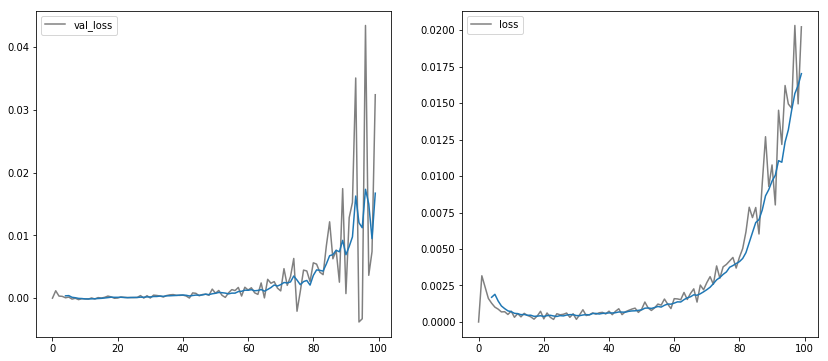

In [9]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)
axs[0].legend ()

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)
axs[1].legend ()

fig.set_size_inches ((14, 6))
plt.show ()

In [10]:
with open ('20180906-155602_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 64, 'loss': "<class 'function'>", 'val_split': 0.10256410256410256, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


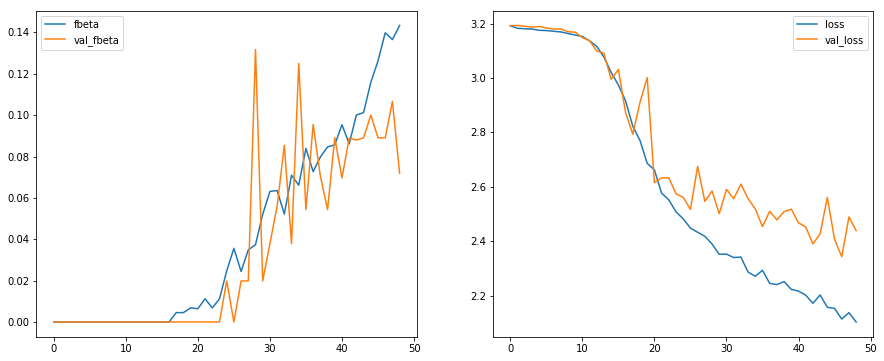

In [6]:
history = plot_history ('20180906-155602_model.hist.csv', -1)

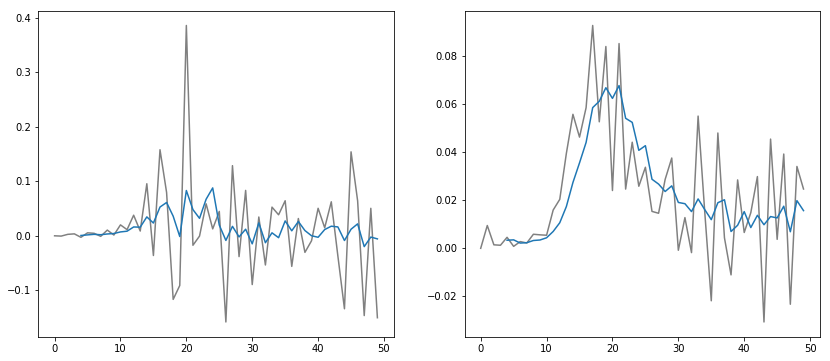

In [12]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [13]:
with open ('20180906-163025_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 40, 'loss': "<class 'function'>", 'val_split': 0.10256410256410256, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


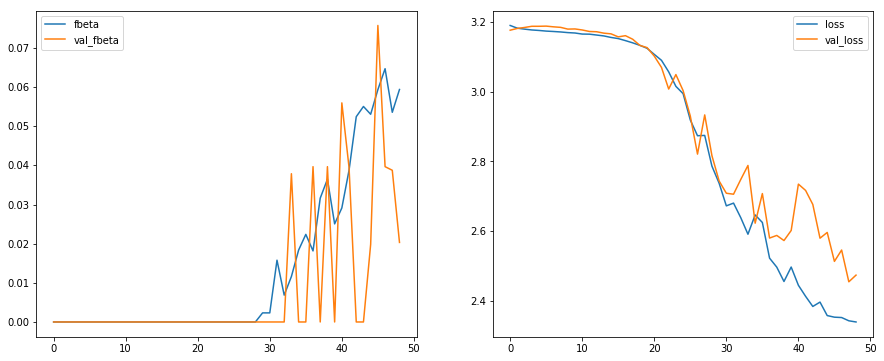

In [14]:
history = plot_history ('20180906-163025_model.hist.csv', -1)

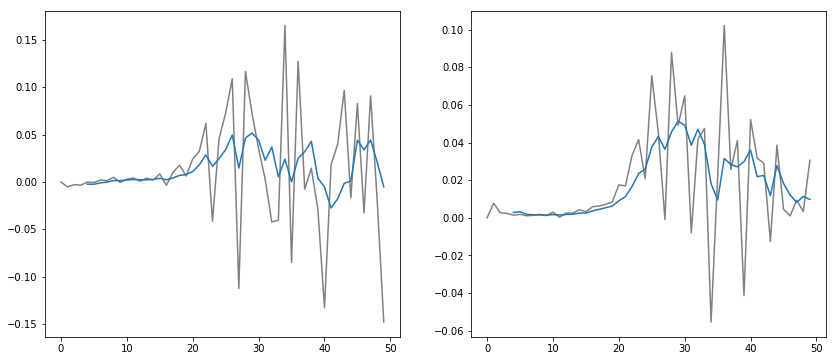

In [15]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [16]:
with open ('20180906-170156_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 40, 'loss': "<class 'function'>", 'val_split': 0.20512820512820512, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


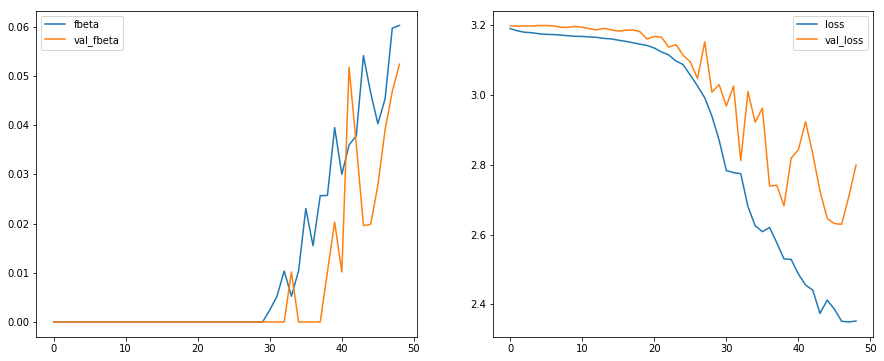

In [17]:
history = plot_history ('20180906-170156_model.hist.csv', -1)

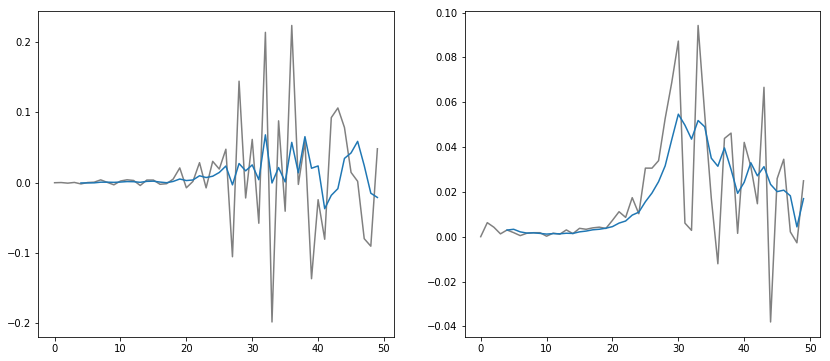

In [18]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [19]:
with open ('20180906-173423_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'batch_size': 62, 'loss': "<class 'function'>", 'val_split': 0.20512820512820512, 'mom': 0.0, 'seed': 42, 'use_img_std': True, 'lr': 0.1, 'epochs': 50, 'opt': "<class 'keras.optimizers.SGD'>"}


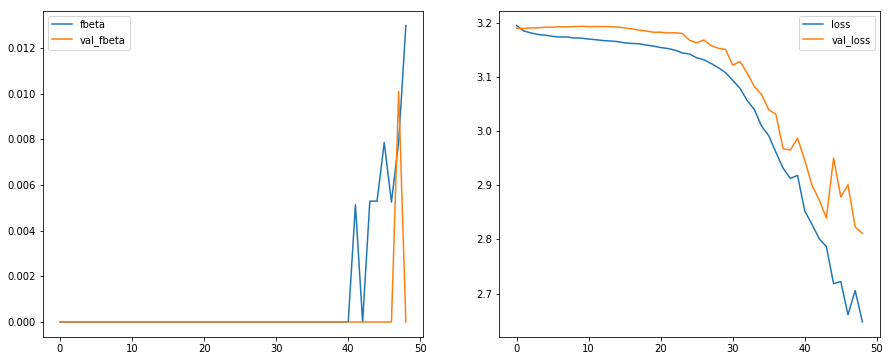

In [20]:
history = plot_history ('20180906-173423_model.hist.csv', -1)

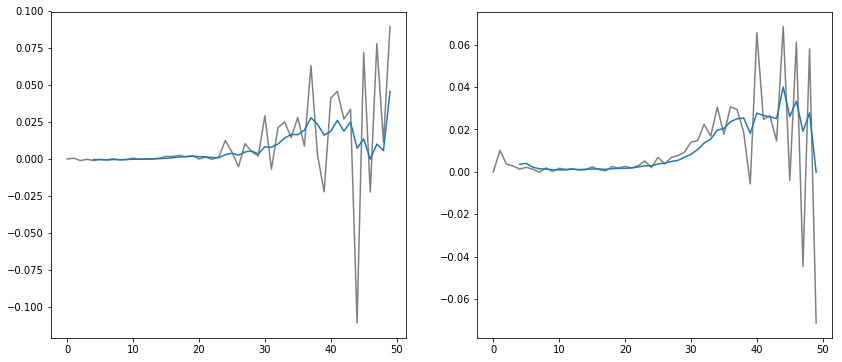

In [21]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

In [ ]:
# mehr Daten frür Lernen -> val_split = 6/39 (~15 %) -> 792 training samples -> batch_size = 44

In [7]:
with open ('20180907-114012_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'seed': 42, 'mom': 0.3, 'val_split': 0.15384615384615385, 'epochs': 200, 'use_img_std': True, 'lr': 0.1, 'opt': "<class 'keras.optimizers.SGD'>", 'batch_size': 22, 'loss': "<class 'function'>"}


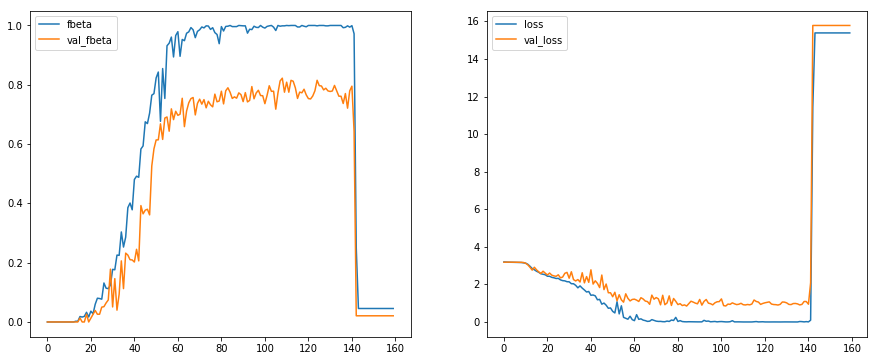

In [11]:
history = plot_history ('20180907-114012_model.hist.csv', 160)

In [13]:
# load model architecture
import os
from keras import models

load_name = os.path.join ('20180907-114012_model.arch.yaml')
print ('>>> loading and compiling model...', end=' ', flush=True)
with open (load_name, 'r') as yaml_file:
    yaml_string = yaml_file.read ()
model = models.model_from_yaml (yaml_string)
#model.compile (optimizer=opt_sgd, loss=loss, metrics=[fbeta])
print ('done')

# load best weights
print ('>>> loading best weights into model...', end=' ', flush=True)
model.load_weights (os.path.join ('20180907-114012_model.weights.b.h5'))
print ('done')

model.summary ()

>>> loading and compiling model... done
>>> loading best weights into model... done
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 160, 160, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 160, 32)      160       
_________________________________________________________________
maxp_1 (MaxPooling2D)        (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 64)        8256      
_________________________________________________________________
maxp_2 (MaxPooling2D)        (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 40, 128)       32896     
__________________________________________________________

---

In [64]:
with open ('20180907-073030_model.param.txt','r') as f:
    output = f.read ()
    print (output)

{'seed': 42, 'mom': 0.3, 'val_split': 0.15384615384615385, 'epochs': 450, 'use_img_std': True, 'lr': 0.1, 'opt': "<class 'keras.optimizers.SGD'>", 'batch_size': 44, 'loss': "<class 'function'>"}


In [65]:
# load model architecture
import os
from keras import models

load_name = os.path.join ('20180907-073030_model.arch.yaml')
print ('>>> loading and compiling model...', end=' ', flush=True)
with open (load_name, 'r') as yaml_file:
    yaml_string = yaml_file.read ()
model = models.model_from_yaml (yaml_string)
#model.compile (optimizer=opt_sgd, loss=loss, metrics=[fbeta])
print ('done')

# load best weights
print ('>>> loading best weights into model...', end=' ', flush=True)
model.load_weights (os.path.join ('20180907-073030_model.weights.b.h5'))
print ('done')

model.summary ()

>>> loading and compiling model... done
>>> loading best weights into model... done
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 160, 160, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 160, 64)      320       
_________________________________________________________________
maxp_1 (MaxPooling2D)        (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 128)       32896     
_________________________________________________________________
maxp_2 (MaxPooling2D)        (None, 40, 40, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 40, 256)       131328    
__________________________________________________________

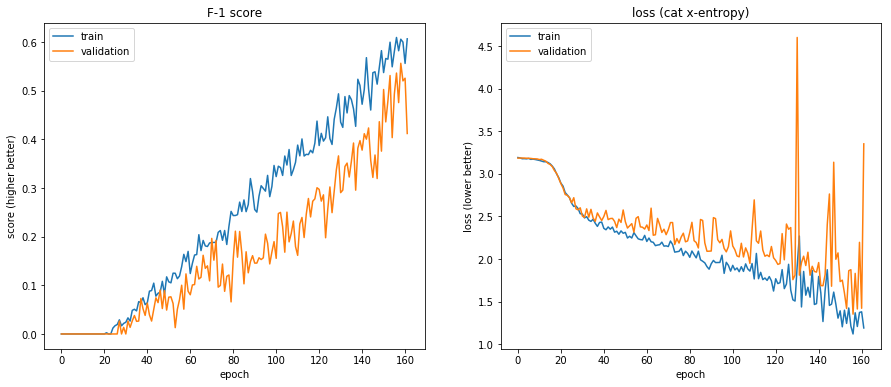

In [66]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

filename = '20180907-073030_model.hist.csv'
epochs = 162

history = pd.read_csv (filename)
history.rename (columns={'Unnamed: 0': 'epoch'}, inplace=True)

fig, axs = plt.subplots (1,2)

axs[0].plot (history['epoch'][:epochs], history['fbeta'][:epochs])
axs[0].plot (history['epoch'][:epochs], history['val_fbeta'][:epochs])
axs[0].set (xlabel='epoch', ylabel='score (higher better)', title='F-{} score'.format (PARAM_BETA))
axs[0].legend (['train', 'validation'], loc='upper left')

axs[1].plot (history['epoch'][:epochs], history['loss'][:epochs])
axs[1].plot (history['epoch'][:epochs], history['val_loss'][:epochs])
axs[1].set (xlabel='epoch', ylabel='loss (lower better)', title='loss (cat x-entropy)')
axs[1].legend (['train', 'validation'], loc='upper left')

fig.set_size_inches ((15, 6))
plt.show ()

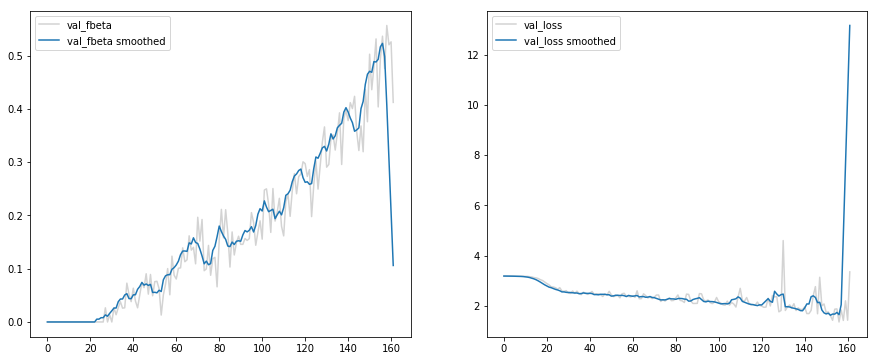

In [67]:
fig, axs = plt.subplots (1,2)


#axs[0].plot (history['epoch'][:epochs], history['fbeta'][:epochs])
axs[0].plot (history['epoch'][:epochs], history['val_fbeta'][:epochs], color='#D3D3D3')
smoothed_vals = running_mean (history['val_fbeta'].values, 5)
axs[0].plot ((history['epoch'][:epochs])[-len(smoothed_vals):], smoothed_vals[:epochs], label='val_fbeta smoothed')
axs[0].legend ()

#axs[1].plot (history['epoch'][:epochs], history['loss'][:epochs])
axs[1].plot (history['epoch'][:epochs], history['val_loss'][:epochs], color='#D3D3D3')
smoothed_vals = running_mean (history['val_loss'].values, 5)
axs[1].plot ((history['epoch'][:epochs])[-len(smoothed_vals):], smoothed_vals[:epochs], label='val_loss smoothed')
axs[1].legend ()

fig.set_size_inches ((15, 6))
plt.show ()

In [68]:
idx_min_loss = history['val_loss'].idxmin ()

print (' val_loss : ', history['val_loss'].min ())
print ('     loss : ', history['loss'][idx_min_loss])
print ('    fbeta : ', history['fbeta'][idx_min_loss])
print ('val_fbeta : ', history['val_fbeta'][idx_min_loss])

 val_loss :  1.3516860637399886
     loss :  1.1193079418606229
    fbeta :  0.6096924808290269
val_fbeta :  0.5365167260169983


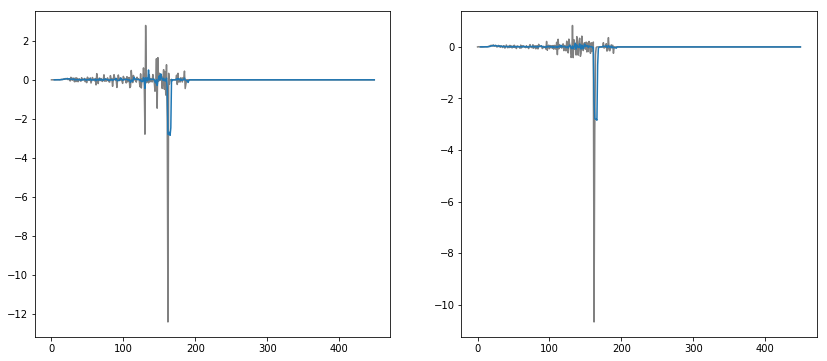

In [69]:
diff_val_loss = (history['val_loss'].shift () - history['val_loss']).fillna (0)
diff_val_loss = pd.DataFrame (history['epoch']).join (diff_val_loss)

diff_loss = (history['loss'].shift () - history['loss']).fillna (0)
diff_loss = pd.DataFrame (history['epoch']).join (diff_loss)

fig, axs = plt.subplots (1,2)
axs[0].plot (diff_val_loss['epoch'], diff_val_loss['val_loss'], color='grey')
smoothed_val_loss = running_mean (diff_val_loss['val_loss'].values, 5)
axs[0].plot (diff_val_loss['epoch'][-len(smoothed_val_loss):], smoothed_val_loss)

axs[1].plot (diff_loss['epoch'], diff_loss['loss'], color='grey')
smoothed_loss = running_mean (diff_loss['loss'].values, 5)
axs[1].plot (diff_loss['epoch'][-len(smoothed_loss):], smoothed_loss)

fig.set_size_inches ((14, 6))
plt.show ()

## Benchmarking
---

In [2]:
from keras import backend as K

PARAM_BETA = 1
def fbeta (y_true, y_pred):

    # just in case of hipster activation at the final layer
    y_pred = K.clip (y_pred, 0, 1)

    tp = K.sum (K.round (y_true * y_pred)) + K.epsilon ()
    fp = K.sum (K.round (K.clip (y_pred - y_true, 0, 1)))
    fn = K.sum (K.round (K.clip (y_true - y_pred, 0, 1)))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = PARAM_BETA ** 2
    return (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall)

Using TensorFlow backend.


In [3]:
# load model architecture
import os
from keras import models

load_name = os.path.join ('20180907-073030_model.arch.yaml')
print ('>>> loading model...', end=' ', flush=True)
with open (load_name, 'r') as yaml_file:
    yaml_string = yaml_file.read ()
model = models.model_from_yaml (yaml_string)
#model.compile (optimizer=opt_sgd, loss=loss, metrics=[fbeta])
print ('done')

# load best weights
print ('>>> loading best weights into model...', end=' ', flush=True)
model.load_weights (os.path.join ('20180907-073030_model.weights.b.h5'))
print ('done')

model.summary ()

>>> loading model... done
>>> loading best weights into model... done
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 160, 160, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 160, 64)      320       
_________________________________________________________________
maxp_1 (MaxPooling2D)        (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 128)       32896     
_________________________________________________________________
maxp_2 (MaxPooling2D)        (None, 40, 40, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 40, 256)       131328    
_________________________________________________________________
maxp_3

In [4]:
from keras import optimizers, losses

# old params: lr=0.001, mom=0.8
PARAM_LR = 0.1 #0.0005
PARAM_MOM = 0.3 #0.95
opt = optimizers.SGD (lr=PARAM_LR, momentum=PARAM_MOM)

loss = losses.categorical_crossentropy

model.compile (optimizer=opt, loss=loss, metrics=[fbeta])

In [5]:
import numpy as np

PARAM_TARGET_SIZE = 160
def resize_image (img_arr):
    #print ('>>> resizing image to [{}, {}]...'.format (PARAM_IMG_SIZE, PARAM_IMG_SIZE), end=' ', flush=True)
    
    m = img_arr.shape[0]
    n = img_arr.shape[1]
    
    # how many additional cols to add?
    cols_to_add = PARAM_TARGET_SIZE - n
    
    img_resized = np.empty ((1, PARAM_TARGET_SIZE))
    for i in range (m):
        new_line = np.append (img_arr[i], np.zeros (cols_to_add))
        img_resized = np.vstack ((img_resized, new_line))
    
    img_resized = img_resized[1:]
    # now img_resized = (128, 160)
    
    # how many additional rows to add?
    rows_to_add = PARAM_TARGET_SIZE - m
    img_resized = np.vstack ((img_resized, np.zeros ((rows_to_add, PARAM_TARGET_SIZE))))
    # now img_resize = (160, 160)
    
    #print ('done')
    
    return img_resized


from keras.preprocessing import image
from keras import backend as K
import tensorflow as tf
from tqdm import tqdm

PARAM_USE_IMG_STD = True

def path_to_tensor (img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img (img_path, color_mode='grayscale')
    
    # convert PIL.Image.Image type to 3D tensor
    x = image.img_to_array (img)
    x = resize_image (x)
    x = x[:,:,np.newaxis]
    
    # feature standardization to zero mean and stdev of one
    # [2018-09-04] turned out that standardization prevents good learning progress
    # [2018-09-06] try again with standardization
    if PARAM_USE_IMG_STD:
        x = K.eval (tf.image.per_image_standardization (x))
    
    # convert 3D tensor to 4D tensor
    return np.expand_dims (x, axis=0)

def paths_to_tensor (img_paths):
    list_of_tensors = [path_to_tensor (img_path) for img_path in tqdm (img_paths)]
    return np.vstack (list_of_tensors)

In [6]:
import os
import numpy as np
from sklearn import datasets

PARAM_RND_STATE = 42

container_path = os.path.join ('..', 'src_bench', 'src_spectro')
load_content = False

src_bench_spectro_data = datasets.load_files (container_path=container_path,
                                              load_content=load_content,
                                              random_state=PARAM_RND_STATE)
src_bench_spectro_data.keys ()

dict_keys(['target', 'target_names', 'DESCR', 'filenames'])

In [7]:
# key: int number [0, 11], where 0 = C key, 1 = C# key, …, 11 = B key
# mode: int number [0, 1], where 0 = minor, 1 = major 

target_key_names = (('0-0','Cm'), ('0-1','C'), ('1-0','C#m'), ('1-1','C#'),
                    ('2-0','Dm'), ('2-1','D'), ('3-0','D#m'), ('3-1','D#'),
                    ('4-0','Em'), ('4-1','E'),
                    ('5-0','Fm'), ('5-1','F'), ('6-0','F#m'), ('6-1','F#'),
                    ('7-0','Gm'), ('7-1','G'), ('8-0','G#m'), ('8-1','G#'),
                    ('9-0','Am'), ('9-1','A'), ('10-0','A#m'), ('10-1','A#'),
                    ('11-0','Bm'), ('11-1','B'))

target_keys = []
for target_name in src_bench_spectro_data['target_names']:
    for kn_tuple in target_key_names:
        if kn_tuple[0] == target_name:
            target_keys.append (kn_tuple[1])
#print (target_keys, len (target_keys))
#print (src_bench_spectro_data['target_names'], len (src_bench_spectro_data['target_names']))

In [8]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

bench_spectro_tensors = paths_to_tensor (src_bench_spectro_data['filenames'])

100%|██████████| 72/72 [00:03<00:00, 22.50it/s]


In [9]:
from keras.utils import np_utils

X_test = bench_spectro_tensors
y_test = np_utils.to_categorical (np.array (src_bench_spectro_data['target']), 24)

score = model.evaluate (X_test, y_test, verbose=1)
print ([(model.metrics_names[i], score[i]) for i in range (len (model.metrics_names))])

72/72 [==============================] - 7s 103ms/step
[('loss', 4.199851724836561), ('fbeta', 0.14518519464826796)]


In [10]:
# confusion matrix
import pandas as pd
from IPython.display import display
from sklearn.metrics import confusion_matrix

y_true = [y_test[i].argmax () for i in range (len (y_test))]
model_pred = model.predict (X_test)
y_pred = [model_pred[i].argmax () for i in range (len (model_pred))]

cm = confusion_matrix (y_true, y_pred)
cm_pd = pd.DataFrame (data=cm, index=target_keys, columns=target_keys)
# rows = true label, columns = predicted label

pd.set_option ('display.max_columns', 24)
display (cm_pd)

,Cm,C,C#m,C#,A#m,A#,Bm,B,Dm,D,D#m,D#,Em,E,Fm,F,F#m,F#,Gm,G,G#m,G#,Am,A
Cm,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
C#m,0,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
C#,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
A#m,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
A#,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Bm,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
B,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
Dm,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


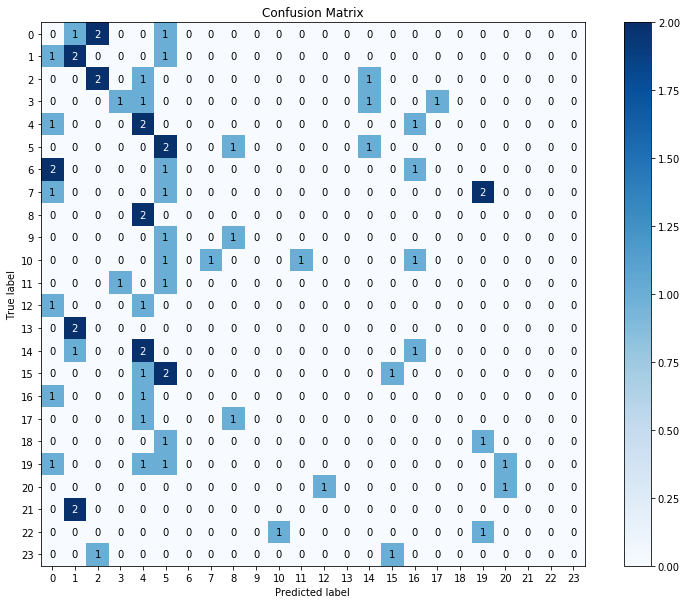

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix (y_true, y_pred, figsize=(14,10));

In [12]:
import pandas as pd

keypoints_names = pd.read_csv ('metric.keypoints.names.csv')
#print (keypoints_names)
keypoints = pd.read_csv ('metric.keypoints.csv')
#print (keypoints)

In [13]:
from collections import defaultdict

keypoints_model = 0.
keypoints_model_list = defaultdict (list)

for true_key in cm_pd.index.values:
    kpn_tk = keypoints_names.iloc[(keypoints_names['note'] == true_key).idxmax ()]

    pos_same_key = np.where (cm_pd.index.values == kpn_tk[0])[0][0]
    pos_dom_key = np.where (cm_pd.index.values == kpn_tk[1])[0][0]
    pos_subdom_key = np.where (cm_pd.index.values == kpn_tk[2])[0][0]
    pos_rel_key = np.where (cm_pd.index.values == kpn_tk[3])[0][0]
    pos_par_key = np.where (cm_pd.index.values == kpn_tk[4])[0][0]
    
    pred_key = true_key
    keypoints = cm_pd[pred_key][pos_same_key] * 1.0 + cm_pd[pred_key][pos_dom_key] * 0.5 + \
                cm_pd[pred_key][pos_subdom_key] * 0.5 + cm_pd[pred_key][pos_rel_key] * 0.3 + \
                cm_pd[pred_key][pos_par_key] * 0.2
    
    keypoints_model += keypoints
    keypoints_model_list[true_key] = [cm_pd[pred_key][pos_same_key], cm_pd[pred_key][pos_dom_key], \
                cm_pd[pred_key][pos_subdom_key], cm_pd[pred_key][pos_rel_key], \
                cm_pd[pred_key][pos_par_key]]
    

keypoints_model = round (keypoints_model, 1)
print ('model key points:', keypoints_model)

model key points: 16.1


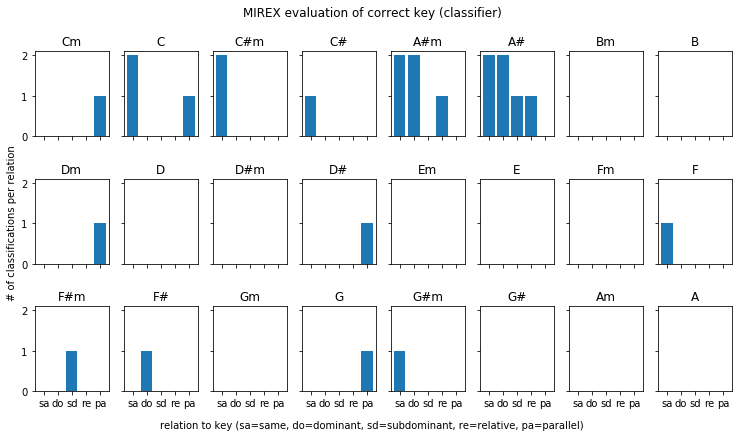

In [86]:
fig, ax = plt.subplots (3, 8, sharex=True, sharey=True)

for (i, key) in enumerate (target_keys):
    r = i//8
    c = i%8
    ax[r][c].bar (range (0,5), keypoints_model_list[key])
    ax[r][c].set_xticks (range (0,5))
    ax[r][c].set_xticklabels (['sa', 'do', 'sd', 're', 'pa'])
    ax[r][c].set_yticks (range (0,cm_pd.values.max ()+1))
    ax[r][c].set_title (key)


fig.text(0.5, 0.05, 'relation to key (sa=same, do=dominant, sd=subdominant, re=relative, pa=parallel)', ha='center', va='center')
fig.text(0.1, 0.5, '# of classifications per relation', ha='center', va='center', rotation='vertical')
fig.suptitle('MIREX evaluation of correct key (classifier)')
fig.set_size_inches ((900/fig.dpi,450/fig.dpi))

plt. subplots_adjust (left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.show ()

### KeyFinder (Benchmark)

In [79]:
import pandas as pd

filename = 'keypoints.keyfinder.csv'
bench_pd = pd.read_csv (filename)
bench_pd.head (2)

,sample,true_key,pred_key_kf,pred_key_kf_2
0,TRALPNU128F4244561,Cm,Eb,D#
1,TRHAANU128E0787F44,Cm,Cm,Cm


In [80]:
# confusion matrix
import pandas as pd
from IPython.display import display
from sklearn.metrics import confusion_matrix

y_true = [(np.where (np.array (target_keys) == bench_pd['true_key'][i])[0][0]) \
          for i in range (len (bench_pd['true_key']))]

y_pred = [(np.where (np.array (target_keys) == bench_pd['pred_key_kf_2'][i])[0][0]) \
          for i in range (len (bench_pd['pred_key_kf_2']))]

cm_bench = confusion_matrix (y_true, y_pred)
cm_bench_pd = pd.DataFrame (data=cm_bench, index=target_keys, columns=target_keys)
# rows = true label, columns = predicted label

pd.set_option ('display.max_columns', 24)
display (cm_bench_pd)

,Cm,C,C#m,C#,A#m,A#,Bm,B,Dm,D,D#m,D#,Em,E,Fm,F,F#m,F#,Gm,G,G#m,G#,Am,A
Cm,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
C,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
C#m,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
C#,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A#m,0,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
A#,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
Bm,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
B,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Dm,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


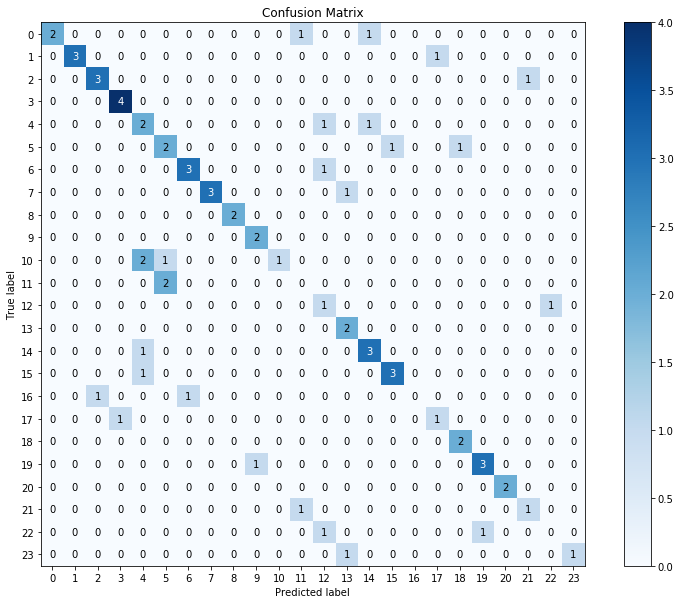

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix (y_true, y_pred, figsize=(14,10));

In [82]:
import pandas as pd

keypoints_names = pd.read_csv ('metric.keypoints.names.csv')
#print (keypoints_names)
keypoints = pd.read_csv ('metric.keypoints.csv')
#print (keypoints)

In [83]:
from collections import defaultdict

keypoints_bench = 0.
keypoints_bench_list = defaultdict (list)

for true_key in cm_bench_pd.index.values:
    kpn_tk = keypoints_names.iloc[(keypoints_names['note'] == true_key).idxmax ()]

    pos_same_key = np.where (cm_bench_pd.index.values == kpn_tk[0])[0][0]
    pos_dom_key = np.where (cm_bench_pd.index.values == kpn_tk[1])[0][0]
    pos_subdom_key = np.where (cm_bench_pd.index.values == kpn_tk[2])[0][0]
    pos_rel_key = np.where (cm_bench_pd.index.values == kpn_tk[3])[0][0]
    pos_par_key = np.where (cm_bench_pd.index.values == kpn_tk[4])[0][0]
    
    pred_key = true_key
    keypoints = cm_bench_pd[pred_key][pos_same_key] * 1.0 + cm_bench_pd[pred_key][pos_dom_key] * 0.5 + \
                cm_bench_pd[pred_key][pos_subdom_key] * 0.5 + cm_bench_pd[pred_key][pos_rel_key] * 0.3 + \
                cm_bench_pd[pred_key][pos_par_key] * 0.2
    
    keypoints_bench += keypoints
    keypoints_bench_list[true_key] = [cm_bench_pd[pred_key][pos_same_key], cm_bench_pd[pred_key][pos_dom_key], \
                cm_bench_pd[pred_key][pos_subdom_key], cm_bench_pd[pred_key][pos_rel_key], \
                cm_bench_pd[pred_key][pos_par_key]]
    

keypoints_bench = round (keypoints_bench, 1)
print ('benchmark key points:', keypoints_bench)

benchmark key points: 55.6


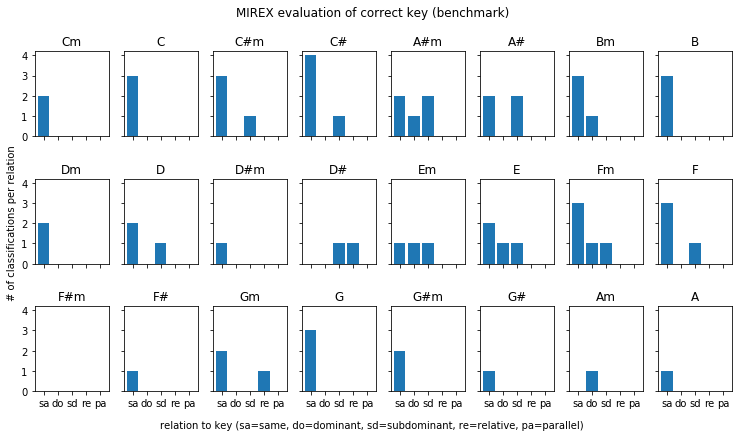

In [85]:
fig, ax = plt.subplots (3, 8, sharex=True, sharey=True)

for (i, key) in enumerate (target_keys):
    r = i//8
    c = i%8
    ax[r][c].bar (range (0,5), keypoints_bench_list[key])
    ax[r][c].set_xticks (range (0,5))
    ax[r][c].set_xticklabels (['sa', 'do', 'sd', 're', 'pa'])
    ax[r][c].set_yticks (range (0,cm_bench_pd.values.max ()+1))
    ax[r][c].set_title (key)


fig.text(0.5, 0.05, 'relation to key (sa=same, do=dominant, sd=subdominant, re=relative, pa=parallel)', ha='center', va='center')
fig.text(0.1, 0.5, '# of classifications per relation', ha='center', va='center', rotation='vertical')
fig.suptitle('MIREX evaluation of correct key (benchmark)')
fig.set_size_inches ((900/fig.dpi,450/fig.dpi))

plt. subplots_adjust (left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
plt.show ()